In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors as c
import time
# Needed to hide warnings in the matplotlib sections
import warnings
warnings.filterwarnings("ignore")

In [2]:
from search import *

In [3]:
class MazeProblem(Problem):

    """The abstract class for a formal problem. You should subclass
    this and implement the methods actions and result, and possibly
    __init__, goal_test, and path_cost. Then you will create instances
    of your subclass and solve them with the various search functions."""

    def __init__(self, initial, goal, maze):
        """The constructor specifies the initial state, and possibly a goal
        state, if there is a unique goal. Your subclass's constructor can add
        other arguments."""
        Problem.__init__(self, initial, goal)
        self.maze = maze

    def actions(self, state):
        """Return the actions that can be executed in the given
        state. The result would typically be a list, but if there are
        many actions, consider yielding them one at a time in an
        iterator, rather than building them all at once."""
        options = []
        x = state[0]
        y = state[1]
        
        if x + 1 < 60 and maze[y][x + 1] == 0: #move right
            options.append((x + 1, y))
        if x - 1 >= 0 and maze[y][x - 1] == 0: #move left
            options.append((x - 1, y))
        if y + 1 < 60 and maze[y + 1][x] == 0: #move up
            options.append((x, y + 1))
        if y - 1 >= 0 and maze[y - 1][x] == 0: #move down
            options.append((x, y - 1))
                    
        return options

    def result(self, state, action):
        return action

    def goal_test(self, state):
        """Return True if the state is a goal. The default method compares the
        state to self.goal or checks for state in self.goal if it is a
        list, as specified in the constructor. Override this method if
        checking against a single self.goal is not enough."""
        if isinstance(self.goal, list):
            return is_in(state, self.goal)
        else:
            return state == self.goal

    def path_cost(self, c, state1, action, state2):
        """Return the cost of a solution path that arrives at state2 from
        state1 via action, assuming cost c to get up to state1. If the problem
        is such that the path doesn't matter, this function will only look at
        state2.  If the path does matter, it will consider c and maybe state1
        and action. The default method costs 1 for every step in the path."""
        return c + 1

    def value(self, state):
        """For optimization problems, each state has a value.  Hill-climbing
        and related algorithms try to maximize this value."""
        raise NotImplementedError

In [6]:
def depth_first_graph_search2(problem, display):
    """Search through the successors of a problem to find a goal.
    The argument frontier should be an empty queue.
    Don't worry about repeated paths to a state. [Figure 3.7]"""
    frontier = [(Node(problem.initial))]  # Stack
    explored = set()
    iterations = 0
    while frontier:
        node = frontier.pop()
        display[node.state[1]][node.state[0]] = 6 #exploring
        iterations += 1
        
        if problem.goal_test(node.state):
            iterations += 1
            return (iterations, node)
        explored.add(node.state)
        
        frontier.extend(child for child in node.expand(problem)
                        if child.state not in explored and
                        child not in frontier)
        
        for n in node.expand(problem):
            display[n.state[1]][n.state[0]] = 4 #frontier
            if n.state not in explored and n not in frontier:
                iterations += 1
        
        display[node.state[1]][node.state[0]] = 5 #explored
        iterations += 1
    return (None, None)

(19, 1) (21, 21)
0.20583748817443848
2206


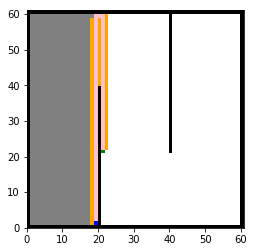

In [38]:
maze = [[] for i in range(0, 61)]

for y in range(0, 61):
    maze[y] = [[] for i in range(61)]
    for x in range(0, 61):
        if x == 0 or x == 60 or y == 0 or y == 60: #external walls
            maze[y][x] = 1
        elif x == 20 and y < 40:    #lower vertical wall
            maze[y][x] = 1
        elif x == 40 and y > 20:    #upper vertical wall
            maze[y][x] = 1
        else:                       #walkable tile
            maze[y][x] = 0

initial = (19, 1)
target = (21, 21)
print(initial, target)

maze_problem = MazeProblem(initial, target, maze)

display = maze.copy()

start = time.time()

iterations, node = depth_first_graph_search2(maze_problem, display)

end = time.time()
print(end - start)

for p in node.solution():
    if display[p[1]][p[0]] != 6:
        display[p[1]][p[0]] = 7
    
display[initial[1]][initial[0]] = 2
display[target[1]][target[0]] = 3

print(iterations)

cMap = c.ListedColormap([
    'white', #not visited
    'black', #wall
    'blue',  #start
    'green', #goal
    'orange',#frontier
    'grey',  #explored
    'red',   #exploring
    'pink']) #solution
plt.pcolormesh(display, cmap=cMap)
plt.clim(0, 8)
plt.axes().set_aspect('equal')
plt.show()